In [1]:
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 80)
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
# read in classified deeds file
rtt_classified = gpd.read_file("data/rtt_investors_classified.geojson")

In [3]:
# Specify coordinate reference system
rtt_classified.crs = 'epsg:2272'

In [4]:
rtt_classified.head()

,id,C_DIG1,C_DIG1DESC,C_DIG2,C_DIG2DESC,C_DIG3,C_DIG3DESC,OBJECTID,Shape__Are,Shape__Len,VACBLDG,YEAR,address_high,address_low,address_low_frac,address_low_suffix,adjusted_assessed_value,adjusted_cash_consideration,adjusted_fair_market_value,adjusted_local_tax_amount,adjusted_other_consideration,adjusted_state_tax_amount,adjusted_total_consideration,assessed_value,cash_consideration,common_level_ratio,condo_name,discrepancy,display_date_x,display_date_y,document_date,document_id,document_type,elapsed,elapsed_days,fair_market_value,grantees_x_x,grantees_x_y,grantees_y,grantors_x,grantors_y,index_right,inv,investor_all,lat,legal_remarks,lng,local_tax_amount,local_tax_percent,matched_regmap,multi_invest,objectid,occ,opa_account_num,other_consideration,owner_occup,property_count,receipt_date,receipt_num,recording_date,reg_map_id,sort_year_x,sort_year_y,state_tax_amount,state_tax_percent,street_address_x,street_address_y,street_name,street_postdir,street_predir,street_suffix,total_consideration,unit_num,ward,zip_code,geometry
0,0,1,Residential,12,Residential Medium,121,Residential Rowhouse,280539,952.673950,165.045972,Fully Vacant,2014,NaN,3083.0,None,None,NaN,58900.0,30699.84,1767.0,NaN,589.0,58900.0,NaN,58900.0,NaN,None,no,2004-04-02T00:00:00,NaT,2004-04-02T00:00:00,50942296,DEED,999,NaN,30699.84,IRWIN LEIGHANNE,None,False,MCCAFFERTY MARIE E; TUCKER MARGARET T,None,285538,0,0.0,-75.109769,None,39.987205,1767.0,100.0,022N240033,NaN,7744699,1,251496000.0,NaN,1,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,022N240033,2004,NaN,589.0,100.0,3083 MEMPHIS ST,None,MEMPHIS,None,None,ST,58900.0,None,25.0,19134.0,POINT (2708216.614 249254.488)
1,1,1,Residential,11,Residential Low,112,Residential SemiDetached,530366,3395.618225,298.879760,None,2016,NaN,3631.0,None,None,NaN,92000.0,63936.00,2760.0,NaN,920.0,92000.0,NaN,92000.0,NaN,None,no,2000-05-25T00:00:00,NaT,2000-05-25T00:00:00,50092387,DEED,999,NaN,63936.00,FALLEN PAUL J III,None,False,TAYLOR COLERIDGE; TAYLOR ROBERT TR; TAYLOR RON...,None,531365,0,0.0,-74.997365,None,40.074151,2760.0,100.0,084N180294,NaN,7744935,1,661087900.0,0.0,1,1.0,2000-06-07T00:00:00,None,2000-06-07T00:00:00,084N180294,2000,NaN,920.0,100.0,3631 AVALON ST,None,AVALON,None,None,ST,92000.0,None,66.0,19114.0,POINT (2738711.806 281873.930)
2,2,1,Residential,12,Residential Medium,121,Residential Rowhouse,474918,1717.321350,237.627137,None,2015,NaN,3430.0,None,None,NaN,123000.0,43066.56,3690.0,NaN,1230.0,123000.0,NaN,123000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942514,DEED,999,NaN,43066.56,RUTA JOSEPH M,None,False,ROWLAND JAMES; ROWLAND JOAN,None,474917,0,0.0,-75.041471,None,40.038977,3690.0,100.0,137N180119,NaN,7744943,1,642110500.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,137N180119,2004,NaN,1230.0,100.0,3430 ALDINE ST,None,ALDINE,None,None,ST,123000.0,None,64.0,19136.0,POINT (2726767.396 268684.790)
3,3,1,Residential,12,Residential Medium,121,Residential Rowhouse,472582,1555.363403,195.088770,None,2012,NaN,5809.0,None,None,NaN,93000.0,45344.64,2790.0,NaN,930.0,93000.0,NaN,93000.0,NaN,None,no,2004-05-28T00:00:00,NaT,2004-05-28T00:00:00,50942516,DEED,999,NaN,45344.64,DUFFIE JAMIE,None,False,LAVIN BETH,None,472581,0,0.0,-75.078006,None,40.028446,2790.0,100.0,139N020114,NaN,7744945,1,621440200.0,NaN,1,1.0,2004-06-08T00:00:00,None,2004-06-08T00:00:00,139N020114,2004,NaN,930.0,100.0,5809 AKRON ST,None,AKRON,None,None,ST,93000.0,None,62.0,19149.0,POINT (2716658.617 264538.633)
4,4,1,Residential,11,Residential Low,111,Residential Detached,475314,6734.606567,352.840272,None,2013,NaN,1403.0,None,None,NaN,68500.0,305913.60,2055.0,NaN,685.0,68500.0,NaN,68500.0,NaN,None,no,2004-05-12T00:00:00,NaT,2004-05-12T00:00:00,50941882,DEED,999,NaN,305913.60,NVR INC,None,True,CHAMPION DEVELOPMENT CORPORATION,None,476313,1,1.0,-75.063039,SUB OF 33,40.070579,2055.0,100.0,154N130125,NaN,7744231,0,562065112.0,NaN,0,1.0,2004-06-07T00:00:00,None,2004-06-07T00:00:00,154N130125,2004,NaN,685.0,100.0,1403 ROSE PETA

In [5]:

topzip = rtt_classified['zip_code'].value_counts() 
topaddress = rtt_classified['street_address_x'].value_counts() 

topaddress.head(10)
#rtt_investors_topaddress.to_file("data/rtt_investors_topaddress.geojson", driver ='GeoJSON')

12 HAMILTON CIR         21
3817 POPLAR ST          20
519 E WASHINGTON LN     12
721 S AMERICAN ST       11
7931 ROANOKE ST         11
322 QUINCE ST           10
210 FOUNTAIN ST         10
505 S 10TH ST UNIT H    10
6540 ALLMAN ST          10
730 LOMBARD ST          10
Name: street_address_x, dtype: int64

In [6]:
rtt_test = rtt_classified
topaddress_1000 = topaddress.iloc[:1000]
addresses=topaddress_1000.index
a_list=list(addresses)
#list2 = ['12 HAMILTON CIR,' '3817 POPLAR ST']

#is_top = rtt_test['street_address_x'].isin(a_list)
is_top = rtt_test['street_address_x'] == '519 E WASHINGTON LN'
#is_top = rtt_test['zip_code'] == 19134
rtt_top = rtt_test[is_top]
#rtt_top['property_count'].mean()
rtt_top['receipt_date'] = pd.to_datetime(rtt_top.receipt_date)
rtt_top.sort_values(by=['receipt_date'])
rtt_top.head(21)



#rtt_top.to_html('temp.html')

/Users/adamvosburgh/opt/anaconda3/envs/geo-2021/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,id,C_DIG1,C_DIG1DESC,C_DIG2,C_DIG2DESC,C_DIG3,C_DIG3DESC,OBJECTID,Shape__Are,Shape__Len,VACBLDG,YEAR,address_high,address_low,address_low_frac,address_low_suffix,adjusted_assessed_value,adjusted_cash_consideration,adjusted_fair_market_value,adjusted_local_tax_amount,adjusted_other_consideration,adjusted_state_tax_amount,adjusted_total_consideration,assessed_value,cash_consideration,common_level_ratio,condo_name,discrepancy,display_date_x,display_date_y,document_date,document_id,document_type,elapsed,elapsed_days,fair_market_value,grantees_x_x,grantees_x_y,grantees_y,grantors_x,grantors_y,index_right,inv,investor_all,lat,legal_remarks,lng,local_tax_amount,local_tax_percent,matched_regmap,multi_invest,objectid,occ,opa_account_num,other_consideration,owner_occup,property_count,receipt_date,receipt_num,recording_date,reg_map_id,sort_year_x,sort_year_y,state_tax_amount,state_tax_percent,street_address_x,street_address_y,street_name,street_postdir,street_predir,street_suffix,total_consideration,unit_num,ward,zip_code,geometry
23680,23680,1,Residential,11,Residential Low,112,Residential SemiDetached,372231,6558.631836,637.303708,None,2015,NaN,519.0,None,None,NaN,60000.0,38064.00,1800.0,NaN,600.0,60000.0,NaN,120000.0,NaN,None,no,2005-01-14T00:00:00,2005-01-14,2005-01-14T00:00:00,51105681,DEED,0,0.0,76128.00,STANTON DEANA L,STANTON DEANA L,False,PITTS COREY,PITTS COREY,373230,0,1.0,-75.174876,"PREMISES ""A""",40.04986,3600.0,100.0,052N120036|052N120017,1.0,7937663,1,592151300.0,0.0,0,2.0,2005-01-27,None,2005-01-27T00:00:00,052N120017,2005,2005.0,1200.0,100.0,519 E WASHINGTON LN,519 E WASHINGTON LN,WASHINGTON,None,E,LN,120000.0,None,59.0,19144.0,POINT (2689315.366 271530.301)
85627,85627,1,Residential,11,Residential Low,112,Residential SemiDetached,372231,6558.631836,637.303708,None,2015,NaN,519.0,None,None,NaN,92500.0,36400.00,2775.0,NaN,925.0,92500.0,NaN,185000.0,NaN,None,no,2006-09-27T00:00:00,2006-09-27,2006-09-27T00:00:00,51542954,DEED,999,NaN,72800.00,FLEMING CHARLES PENDELTON III; FLEMING ELLEN I...,FLEMING CHARLES PENDELTON III; FLEMING ELLEN I...,False,STANTON DEANA L,STANTON DEANA L,373230,0,1.0,-75.174876,"PREMISES ""A""",40.04986,5550.0,100.0,052N120036|052N120017,1.0,8463961,1,592151300.0,NaN,0,2.0,2006-10-03,None,2006-10-03T00:00:00,052N120017,2006,2006.0,1850.0,100.0,519 E WASHINGTON LN,519 E WASHINGTON LN,WASHINGTON,None,E,LN,185000.0,None,59.0,19144.0,POINT (2689315.366 271530.301)
85628,85628,1,Residential,11,Residential Low,112,Residential SemiDetached,372231,6558.631836,637.303708,None,2015,NaN,519.0,None,None,NaN,92500.0,36400.00,2775.0,NaN,925.0,92500.0,NaN,185000.0,NaN,None,no,2006-09-27T00:00:00,2006-09-27,2006-09-27T00:00:00,51542954,DEED,0,0.0,72800.00,FLEMING CHARLES PENDELTON III; FLEMING ELLEN I...,FLEMING CHARLES PENDELTON III; FLEMING ELLEN I...,False,STANTON DEANA L,STANTON DEANA L,373230,0,1.0,-75.174876,"PREMISES ""B""",40.04986,5550.0,100.0,052N120036|052N120017,1.0,8463962,1,592151300.0,NaN,0,2.0,2006-10-03,None,2006-10-03T00:00:00,052N120036,2006,2006.0,1850.0,100.0,519 E WASHINGTON LN,519 E WASHINGTON LN,WASHINGTON,None,E,LN,185000.0,None,59.0,19144.0,POINT (2689315.366 271530.301)
200803,200803,1,Residential,11,Residential Low,112,Residential SemiDetached,372231,6558.631836,637.303708,None,2015,NaN,519.0,None,None,NaN,107500.0,61847.52,3225.0,NaN,1075.0,107500.0,NaN,215000.0,NaN,None,no,2011-09-16T00:00:00,2011-09-16,2011-09-16T00:00:00,52396942,DEED,999,NaN,123695.04,KOLODZIEY ALLISON; KOLODZIEY JOHN,KOLODZIEY ALLISON; KOLODZIEY JOHN,False,FLEMING CHARLES PENDELTON III; FLEMING ELLEN I...,FLEMING CHARLES PENDELTON III; FLEMING ELLEN I...,373230,0,1.0,-75.174876,None,40.04986,6450.0,100.0,052N120036|052N120017,1.0,9501139,1,592151300.0,0.0,0,2.0,2011-10-04,None,2011-10-04T00:00:00,052N120017,2011,2011.0,2150.0,100.0,519 E WASHINGTON LN,519 E WASHINGTON LN,WASHINGTON,None,E,LN,215000.0,None,59.0,19144.0,POINT (2689315.366 271530.301)
200804,200804,1,Residential,11,Residential Low,112,Residential Se

<AxesSubplot:>

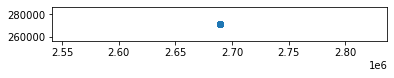

In [7]:
rtt_top.plot()